In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print("--- Data Loading ---")
try:
    df = pd.read_csv(r'C:\Users\Pushpalatha A\OneDrive\Desktop\Samson\Wine_Quality_Data.csv')
    print("Dataset loaded successfully. First 5 rows:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
except FileNotFoundError:
    print("Error: 'Wine_Quality_Data.csv' not found. Please ensure the file is in the correct directory.")
    exit()


--- Data Loading ---
Dataset loaded successfully. First 5 rows:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality co

In [5]:
# --- 2. Preliminary Cleaning ---
print("\n--- Preliminary Cleaning ---")

# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# A common strategy for missing values in numerical columns is to fill with median/mean
# or drop rows/columns. For this dataset, let's assume dropping rows with any missing data
# if they exist, to keep it simple.
initial_rows = df.shape[0]
df.dropna(inplace=True)
rows_after_dropna = df.shape[0]
if initial_rows > rows_after_dropna:
    print(f"\nDropped {initial_rows - rows_after_dropna} rows with missing values.")
else:
    print("\nNo missing values found or dropped (all data was clean).")

# Verify data types (df.info() already gives a good overview,
# but we can explicitly check if any column needs specific conversion if not inferred correctly)
# For this dataset, pandas should correctly infer most types.



--- Preliminary Cleaning ---
Missing values before cleaning:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

No missing values found or dropped (all data was clean).


In [6]:
# --- 3. Simple Transformations ---
print("\n--- Simple Transformations ---")

# Create a new feature: 'sulfur_dioxide_ratio'
# This ratio can indicate the proportion of free SO2 to total SO2.
# We'll handle division by zero by setting the ratio to 0 if total_sulfur_dioxide is 0.
df['sulfur_dioxide_ratio'] = df.apply(
    lambda row: row['free_sulfur_dioxide'] / row['total_sulfur_dioxide'] if row['total_sulfur_dioxide'] != 0 else 0,
    axis=1
)
print("Created a new feature: 'sulfur_dioxide_ratio'. First 5 rows with new feature:")
print(df[['free_sulfur_dioxide', 'total_sulfur_dioxide', 'sulfur_dioxide_ratio']].head())




--- Simple Transformations ---
Created a new feature: 'sulfur_dioxide_ratio'. First 5 rows with new feature:
   free_sulfur_dioxide  total_sulfur_dioxide  sulfur_dioxide_ratio
0                 11.0                  34.0              0.323529
1                 25.0                  67.0              0.373134
2                 15.0                  54.0              0.277778
3                 17.0                  60.0              0.283333
4                 11.0                  34.0              0.323529



--- Generating Visualizations ---


C:\Users\Pushpalatha A\AppData\Local\Temp\ipykernel_13796\3574718641.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


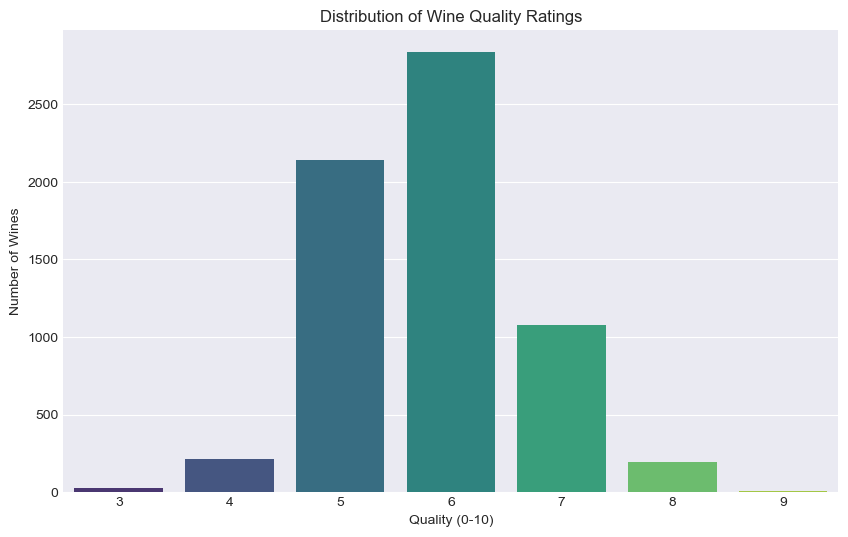

In [7]:
# --- 4. Insightful Visualizations ---
print("\n--- Generating Visualizations ---")

plt.style.use('seaborn-v0_8-darkgrid') # Set a nice style for plots

# Visualization 1: Distribution of Wine Quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality (0-10)')
plt.ylabel('Number of Wines')
plt.xticks(rotation=0)
plt.show()



C:\Users\Pushpalatha A\AppData\Local\Temp\ipykernel_13796\2549147537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='magma')


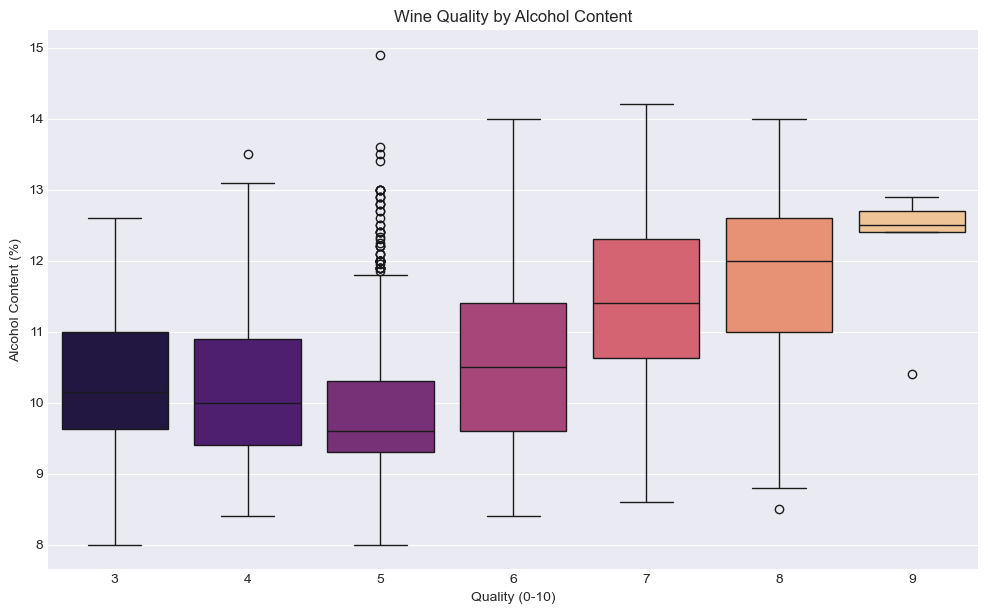

In [8]:
# Visualization 2: Relationship between Alcohol Content and Quality
plt.figure(figsize=(12, 7))
sns.boxplot(x='quality', y='alcohol', data=df, palette='magma')
plt.title('Wine Quality by Alcohol Content')
plt.xlabel('Quality (0-10)')
plt.ylabel('Alcohol Content (%)')
plt.show()


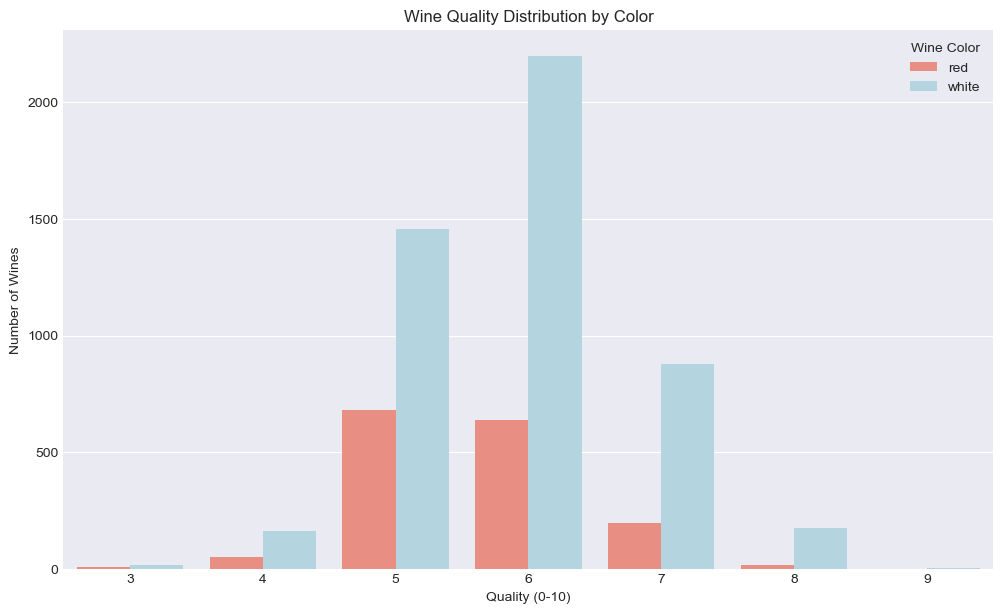


Analysis complete. Visualizations displayed.


In [9]:
# Visualization 3: Categorical Breakdown - Quality by Wine Color
plt.figure(figsize=(12, 7))
sns.countplot(x='quality', hue='color', data=df, palette={'red': 'salmon', 'white': 'lightblue'})
plt.title('Wine Quality Distribution by Color')
plt.xlabel('Quality (0-10)')
plt.ylabel('Number of Wines')
plt.legend(title='Wine Color')
plt.show()

print("\nAnalysis complete. Visualizations displayed.")
